## 0. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="husl")


## 1. Data Loading & Inspection

In [2]:
df = pd.read_csv('student_performance_dataset.csv')

print("Dataset loaded successfully!")

Dataset loaded successfully!


### First & last 5 rows

In [3]:
#First 5 rows
df.head()



,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [4]:
#Last 5 rows
df.tail()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass
707,S046,Female,22,80.404392,93,Bachelors,Yes,No,55,Fail


### Data types & non-null counts

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


### Statistical summary

In [6]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


## 2. Data Cleaning


### Missing values

#### Check missing values

In [7]:
null_cols = df.isnull().sum()
null_cols.sort_values(ascending=False)

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [8]:

if null_cols.sum() > 0:
    print("Columns with missing values:")
    print(null_cols[null_cols > 0])


In [9]:
print("Percent of nulls for each column")
null_percent = (null_cols / len(df)) * 100
null_percent = null_percent.sort_values(ascending=False)

null_percent


Percent of nulls for each column


Student_ID                    0.0
Gender                        0.0
Study_Hours_per_Week          0.0
Attendance_Rate               0.0
Past_Exam_Scores              0.0
Parental_Education_Level      0.0
Internet_Access_at_Home       0.0
Extracurricular_Activities    0.0
Final_Exam_Score              0.0
Pass_Fail                     0.0
dtype: float64

#### Steps to Handle Missing Values
1. **Checked for missing values** in all columns of the dataset using null-value inspection.
2. **Filled missing values in numerical columns** using the **median**.
3. **Filled missing values in categorical columns** using the **mode**.
4. **No columns were dropped**, as none of the variables contained more than 75% missing values.


#### Handle missing values


In [10]:
# Fill missing values using the mode (most frequent value)
mode_value = df["Parental_Education_Level"].mode()[0]
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(mode_value)


### Duplicates values

#### Check duplicates


In [11]:
n=int(df.duplicated().sum())

print(f"Number of duplicate rows: {n}")



Number of duplicate rows: 208


#### Steps to handle duplicates values:
1. **Remove duplicates**, if any.


#### Remove duplicates


In [12]:
df.drop_duplicates(inplace=True)

### Inconsistent entry values

#### Steps to handle duplicates values:
1.**Check for inconsistent entries** in categorical features.


#### Check inconsistent entries

In [13]:
df['Pass_Fail'].unique()


array(['Pass', 'Fail'], dtype=object)

correct input ['Pass', 'Fail']
**no bad input**

In [14]:
df['Extracurricular_Activities'].unique()


array(['Yes', 'No'], dtype=object)

correct input ['Yes', 'No']
**no bad input**

In [15]:
df['Internet_Access_at_Home'].unique()

array(['Yes', 'No'], dtype=object)

correct input ['Yes', 'No']
**no bad input**

In [16]:
df['Parental_Education_Level'].unique()

array(['High School', 'PhD', 'Bachelors', 'Masters'], dtype=object)

the was bad input in **Phd** as input it must be as **PhD**
- **we need to fix it**

In [17]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

correct input ['Male', 'Female'] **no bad input**

#### Fix inconsistent entries

In [18]:
df["Parental_Education_Level"] = df["Parental_Education_Level"].replace("Phd", "PhD")


In [19]:
df['Parental_Education_Level'].unique()

array(['High School', 'PhD', 'Bachelors', 'Masters'], dtype=object)

now all right data in df['Parental_Education_Level']

## 3. Univariate Analysis

### 3.1. Analysis Numerical Features

#### Histogram

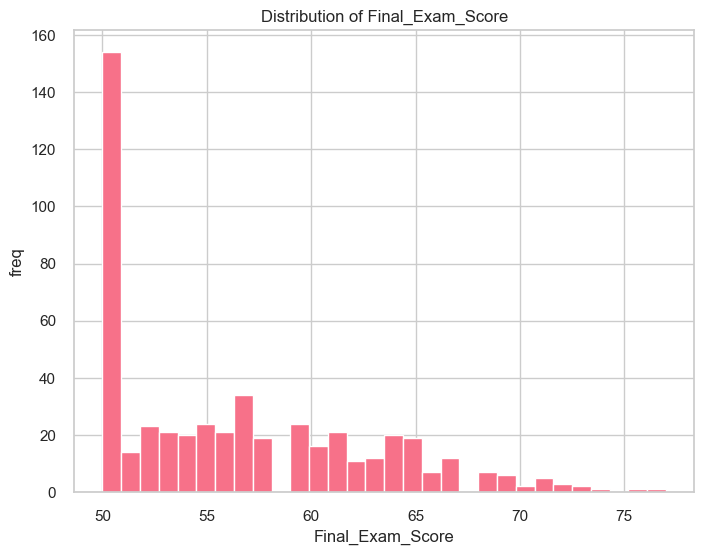

In [20]:
#Histogram for Final_Exam_Score
plt.figure(figsize=(8,6))
plt.hist(df['Final_Exam_Score'], bins=30)
plt.title('Distribution of Final_Exam_Score')
plt.xlabel('Final_Exam_Score')
plt.ylabel('freq')
plt.show()

In [21]:
cols_to_plot=df.columns[2:5]

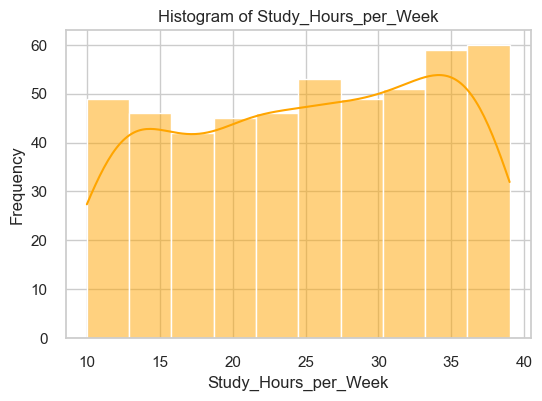

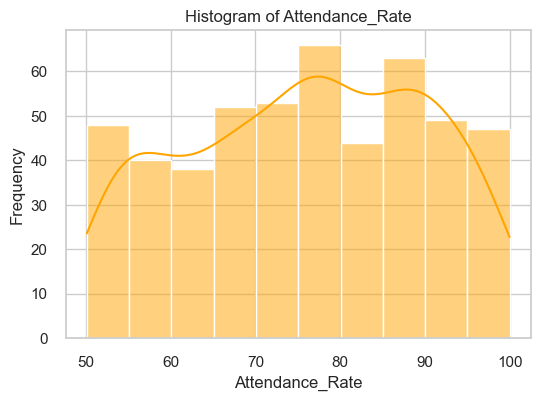

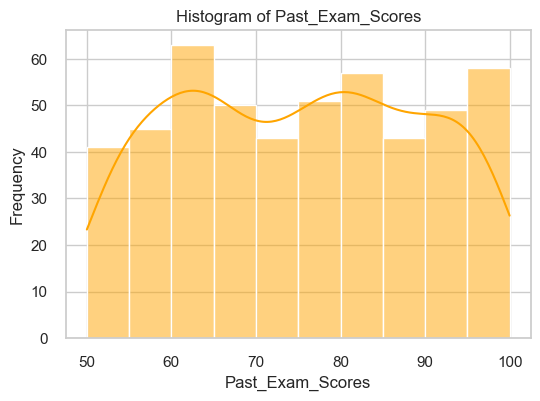

In [22]:
#Histogram for
for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='orange')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### boxblot

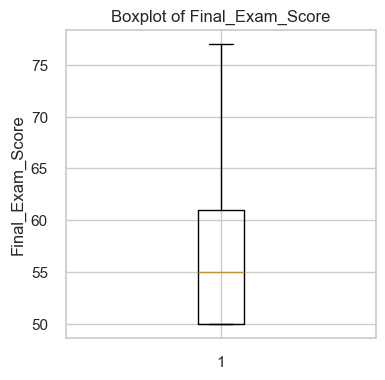

In [23]:
#boxblot for Final_Exam_Score
plt.figure(figsize=(4,4))
plt.boxplot(df['Final_Exam_Score'])
plt.title('Boxplot of Final_Exam_Score')
plt.ylabel('Final_Exam_Score')
plt.show()


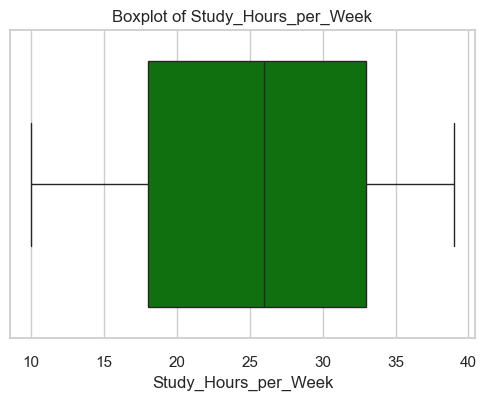

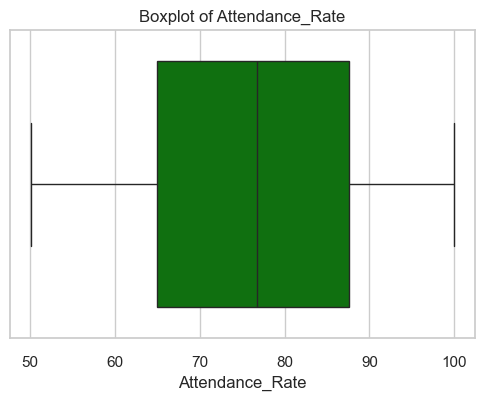

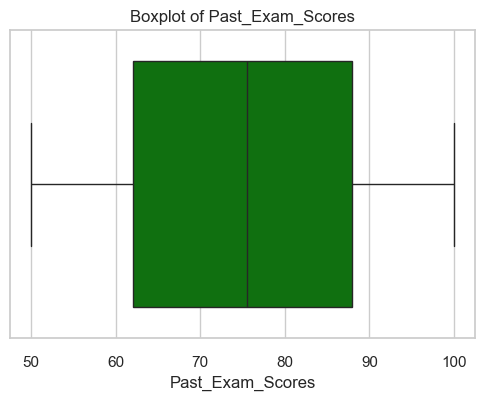

In [24]:
#boxblot for the first 5 columns
cols_to_plot = df.columns[2:5]
for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

The two graphs show a right-skewed distribution of scores, with fewer students achieving higher marks. A noticeable peak occurs around a score of approximately 53 or lower, indicating that many students fall within this range. This explains why there is a large number of students failing.

###3.2 Analysis Categorical Features

#### Bar Chart

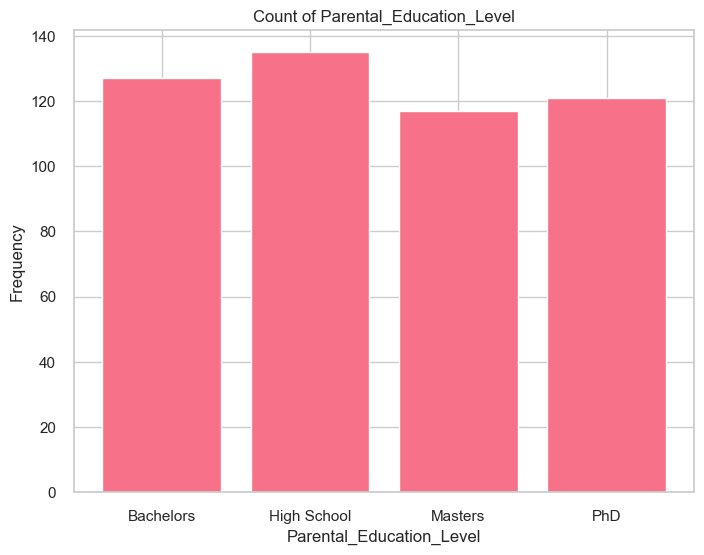

In [25]:
# Bar chart for Parental_Education_Level
counts = df['Parental_Education_Level'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.bar(counts.index, counts.values)
plt.xticks(counts.index)
plt.title('Count of Parental_Education_Level')
plt.xlabel('Parental_Education_Level')
plt.ylabel('Frequency')
plt.show()


The figure shows diversity in parents education levels, with no level being higher than another as the proportions across the different levels are very close and nearly equal

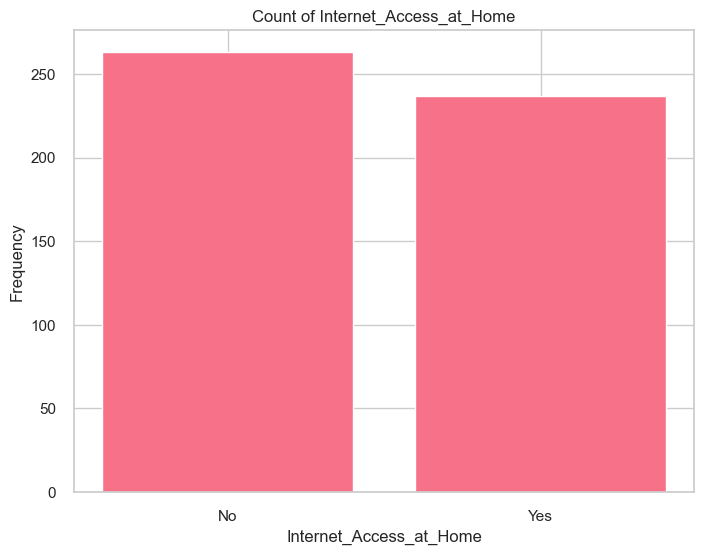

In [26]:
# Bar chart for Internet_Access_at_Home
counts = df['Internet_Access_at_Home'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.bar(counts.index, counts.values)
plt.xticks(counts.index)
plt.title('Count of Internet_Access_at_Home')
plt.xlabel('Internet_Access_at_Home')
plt.ylabel('Frequency')
plt.show()

The percentages are fairly , close some individuals have internet access at home, while others do not. No group significantly outnumbers another, but it could be argued that the group without internet access was slightly larger than the group with it

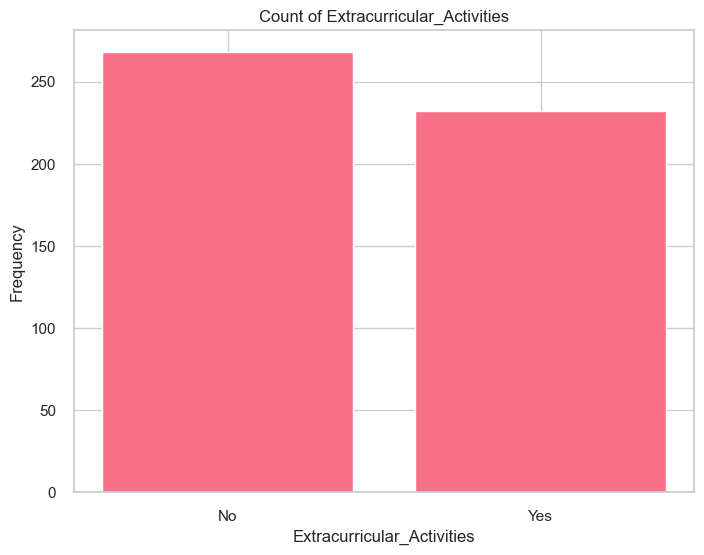

In [27]:
# Bar chart for Extracurricular_Activities
counts = df['Extracurricular_Activities'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.bar(counts.index, counts.values)
plt.xticks(counts.index)
plt.title('Count of Extracurricular_Activities')
plt.xlabel('Extracurricular_Activities')
plt.ylabel('Frequency')
plt.show()

The image shows that the number of students who do not participate in extracurricular activities is slightly higher than the number who do the percentage is fairly close

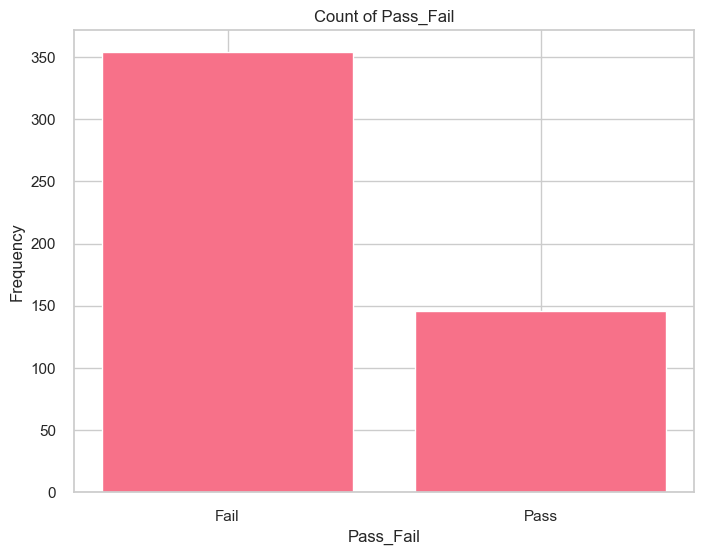

In [28]:
# Bar chart for Pass_Fail
counts = df['Pass_Fail'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.bar(counts.index, counts.values)
plt.xticks(counts.index)
plt.title('Count of Pass_Fail')
plt.xlabel('Pass_Fail')
plt.ylabel('Frequency')
plt.show()

The image shows that the number of failures (Fail) is higher than the number of passes (Pass)

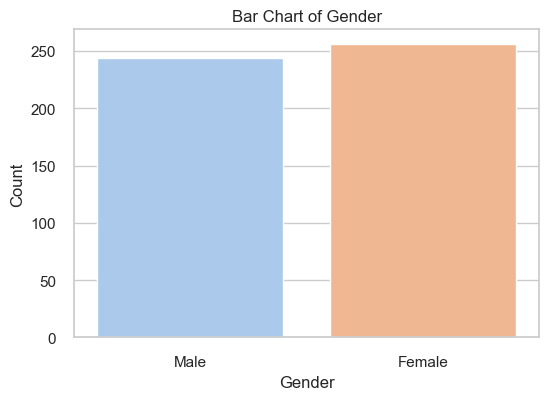

In [29]:
#Bar chart for gender
plt.figure(figsize=(6, 4))

sns.countplot(x=df['Gender'], palette='pastel')
plt.title('Bar Chart of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 4. Bivariate Analysi

Text(0.5, 1.0, 'Correlation Heatmap')

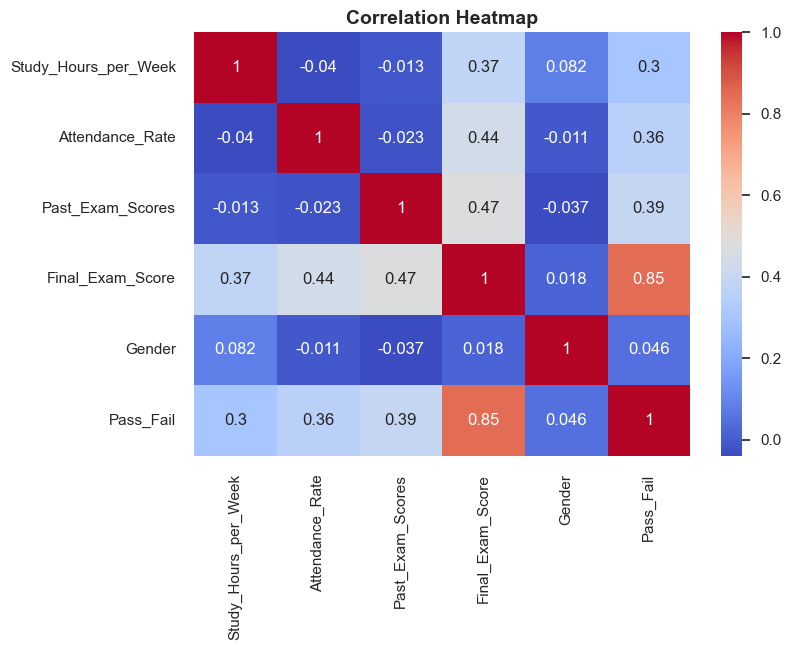

In [30]:
plt.figure()
corr = df.select_dtypes(include='number')
corr['Gender'] = df['Gender'].map({ 'Male' : 0 , 'Female' : 1}).to_frame()
corr['Pass_Fail'] = df['Pass_Fail'].map({'Pass' : 1 , 'Fail' : 0}).to_frame()
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm') # annot --> annotate the value of correlation
plt.title('Correlation Heatmap', fontsize=14, weight='bold')

This heatmap illustrates the correlation coefficients between key variables influencing final exam scores. Notably, Past Exam Scores (r = 0.47), Attendance Rate (r = 0.44), and Study Hours per Week (r = 0.37) show moderate positive correlations with the Final Exam Score.
The variable Gender exhibits negligible correlation with other factors (e.g. Final_Exam_Score-Gender correlation was 0.018)

Text(0.5, 1.0, 'Relationship between Past Exam Scores and Final Exam Score')

<Figure size 800x550 with 0 Axes>

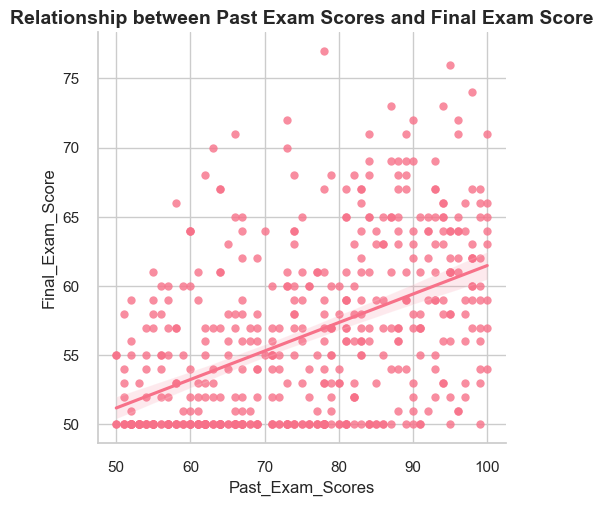

In [31]:
plt.figure()
sns.lmplot(x='Past_Exam_Scores', y='Final_Exam_Score', data=df)
plt.title('Relationship between Past Exam Scores and Final Exam Score' , fontsize=14, weight='bold')

From the x-axis, which represents students’ scores in the previous exam, it appears that some scores were very high, with a few students even achieving a perfect score of 100%. In contrast, the y-axis, which represents students’ scores in the final exam, shows lower scores, with the highest score slightly above 75. This may indicate that the final exam was more difficult compared to the previous exam, while still showing a reasonable correlation between a student’s performance in the previous exam and their performance in the final exam.

([0, 1, 2, 3],
 [Text(0, 0, 'High School'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, 'Masters')])

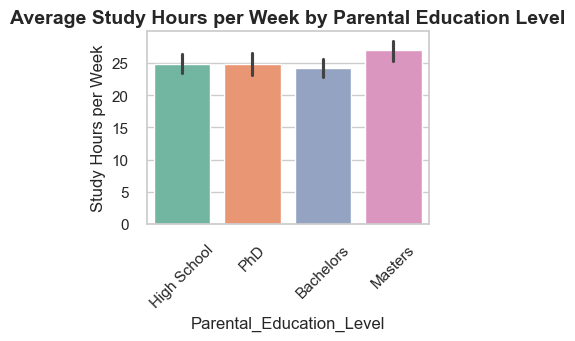

In [32]:
plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Parental_Education_Level', y='Study_Hours_per_Week', palette='Set2')
plt.title('Average Study Hours per Week by Parental Education Level', fontsize=14, weight='bold')
plt.ylabel('Study Hours per Week')
plt.xticks(rotation=45)

It is noticeable that the average study hours of students whose parents hold a Master’s degree were slightly higher than the average study hours of the other students. However, this difference may not be large enough to assume a strong relationship between a student’s study hours and the parents’ educational level.

Text(0.5, 1.0, 'Study Hours Distribution by Pass/Fail')

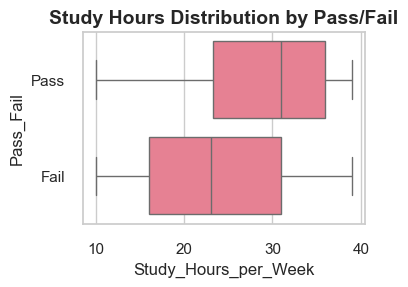

In [33]:
plt.subplot(2, 2, 3)
sns.boxplot(x=df["Study_Hours_per_Week"], y='Pass_Fail' , data=df)
plt.title('Study Hours Distribution by Pass/Fail' , fontsize=14, weight='bold')

The boxplot suggests that weekly study hours are somewhat related to passing or failing. Most students who failed did not exceed 30 hours of study per week, whereas most students who passed studied at least 25 hours per week.

Text(0, 0.5, 'Number of Students')

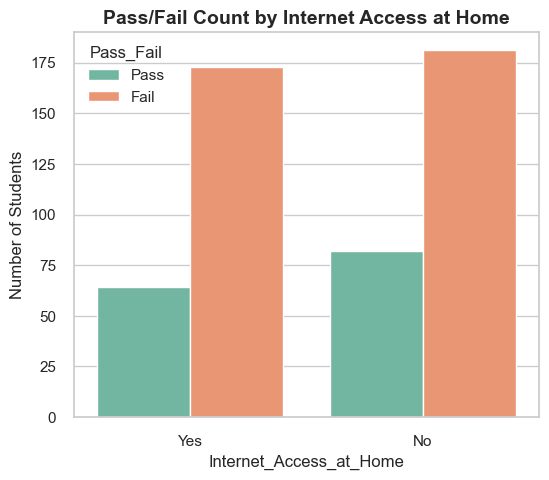

In [34]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Internet_Access_at_Home', hue='Pass_Fail', palette='Set2')
plt.title('Pass/Fail Count by Internet Access at Home', fontsize=14, weight='bold')
plt.ylabel('Number of Students')

ؤThe percentage of students with internet access who failed was slightly lower than that of students without internet access. Conversely, the percentage of students with internet access who passed was slightly lower than that of students without internet access. This suggests that there is no direct relationship between internet availability and student success. However, it is noticeable that the number of students without internet access is higher than those with internet access, which may indicate that the study was conducted some time ago or in less economically developed areas.

Text(0, 0.5, 'Number of Students')

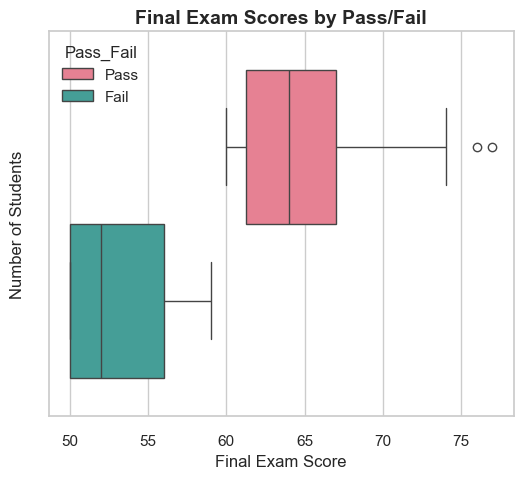

In [35]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Final_Exam_Score', hue='Pass_Fail', palette='husl')
plt.title('Final Exam Scores by Pass/Fail', fontsize=14, weight='bold')
plt.xlabel('Final Exam Score', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

There is a very strong relationship between the final exam score and passing or failing. No student who failed scored above 59, and no student who passed scored below 60. However, most of the students who passed had scores clustered around 65, with only two students scoring slightly above 75, which again highlights the overall weak performance in the final exam and may indicate the exam’s difficulty.

Text(0.5, 1.0, 'Relationship between Attendance Rate and Final Exam Score')

<Figure size 800x550 with 0 Axes>

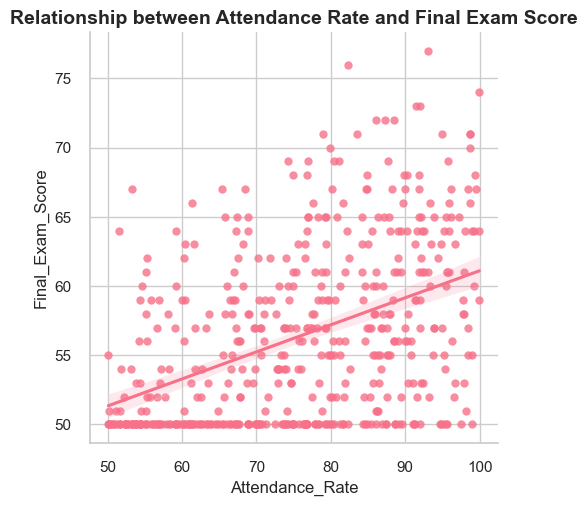

In [36]:
plt.figure()
sns.lmplot(x='Attendance_Rate', y='Final_Exam_Score', data=df)
plt.title('Relationship between Attendance Rate and Final Exam Score', fontsize=14, weight='bold')

There is a clear relationship between attendance rate and final exam scores. Students with lower attendance rates clearly scored lower than their peers.

## 5.Results and conclusions

#### 5.1 Summary of Findings
The analysis of the Student Performance Dataset reveals several critical factors influencing student success. After cleaning the data (imputing missing values, removing duplicates, and fixing inconsistencies), we examined distributions and correlations between various academic and demographic variables.

**Key Drivers of Performance:**

* **Past Performance is the Strongest Predictor:** There is a moderate-to-strong positive correlation (r = 0.47) between Past_Exam_Scores and Final_Exam_Score. Students who performed well historically tended to perform well on the final, although the final exam appeared significantly more difficult overall (maximum scores dropped from 100 in past exams to ~77 in the final).

* **Attendance Matters:** Attendance_Rate showed a strong positive correlation (r = 0.44) with final exam scores. The scatter plots confirmed that students with low attendance rarely achieved passing grades.

* **Effort Pays Off:** Study_Hours_per_Week showed a moderate positive correlation (r = 0.37). The boxplots revealed a distinct threshold: students who passed the exam typically studied more than 25 hours per week, whereas students who failed mostly studied fewer than 20-25 hours.

**Demographic and Environmental Factors:**

* **Gender:** There is negligible correlation (r = 0.018) between gender and final exam scores
, indicating that gender is not a determining factor in student success in this dataset.

* **Parental Education:** While students with parents holding Master's degrees showed slightly higher average study hours, the overall impact of parental education on final outcomes was not definitively strong compared to individual effort metrics like attendance and study time.

* **Internet Access:** Surprisingly, internet access did not show a strong correlation with passing rates. The distribution of pass/fail was relatively similar regardless of internet availability, suggesting that lack of internet is not a primary barrier to success in this specific context.

#### 5.2 Conclusions
The high failure rate observed in the dataset can be attributed primarily to behavioral factors rather than demographic ones.

* **Exam Difficulty:** The final exam was likely much harder than previous assessments, as evidenced by the downward shift in scores (Past Exams vs. Final Exam scatter plot).

#### 5.3 Recommendations

* **Exam Review:** Educators might need to review the difficulty of the final exam, as even the highest-performing students from previous exams struggled to score above 75%.

